# PUC MG - Pontifica Universidade Católica de Minas Gerais

### Pós-Graduação em Ciência de Dados e Big Data

#### TRABALHO DE CONCLUSÃO DE CURSO

#### TÍTULO: Previsão do esgotamento emocional para identificar indivíduos vulneráveis no ambiente de trabalho

#### ALUNO: Davi Dominguez Ferreira


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

sns.set_theme(style="whitegrid")

In [2]:
df_kaggle = pd.read_csv("https://raw.githubusercontent.com/Davidomfer/TCC_PUCMinas/main/train.csv",sep = ",")

In [3]:
df_kaggle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           22750 non-null  object 
 1   Date of Joining       22750 non-null  object 
 2   Gender                22750 non-null  object 
 3   Company Type          22750 non-null  object 
 4   WFH Setup Available   22750 non-null  object 
 5   Designation           22750 non-null  float64
 6   Resource Allocation   21369 non-null  float64
 7   Mental Fatigue Score  20633 non-null  float64
 8   Burn Rate             21626 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.6+ MB


In [4]:
df_kaggle

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52
...,...,...,...,...,...,...,...,...,...
22745,fffe31003500370039003100,2008-12-30,Female,Service,No,1.0,3.0,NaN,0.41
22746,fffe33003000350031003800,2008-01-19,Female,Product,Yes,3.0,6.0,6.7,0.59
22747,fffe390032003000,2008-11-05,Male,Service,Yes,3.0,7.0,NaN,0.72
22748,fffe33003300320036003900,2008-01-10,Female,Service,No,2.0,5.0,5.9,0.52


## Verificando e tratando valores ausentes e duplicados

In [5]:
df_kaggle.isna().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [6]:
df_kaggle.isna().mean()*100

Employee ID             0.000000
Date of Joining         0.000000
Gender                  0.000000
Company Type            0.000000
WFH Setup Available     0.000000
Designation             0.000000
Resource Allocation     6.070330
Mental Fatigue Score    9.305495
Burn Rate               4.940659
dtype: float64

In [7]:
df_kaggle = df_kaggle.dropna()
df_kaggle.isna().sum()

Employee ID             0
Date of Joining         0
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
Burn Rate               0
dtype: int64

In [8]:
df_kaggle = df_kaggle.drop_duplicates('Employee ID')
df_kaggle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18590 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           18590 non-null  object 
 1   Date of Joining       18590 non-null  object 
 2   Gender                18590 non-null  object 
 3   Company Type          18590 non-null  object 
 4   WFH Setup Available   18590 non-null  object 
 5   Designation           18590 non-null  float64
 6   Resource Allocation   18590 non-null  float64
 7   Mental Fatigue Score  18590 non-null  float64
 8   Burn Rate             18590 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.4+ MB


In [9]:
df_kaggle.describe().T

,count,mean,std,min,25%,50%,75%,max
Designation,18590.0,2.179398,1.133148,0.0,1.00,2.00,3.00,5.0
Resource Allocation,18590.0,4.486552,2.044848,1.0,3.00,4.00,6.00,10.0
Mental Fatigue Score,18590.0,5.732173,1.920547,0.0,4.60,5.90,7.10,10.0
Burn Rate,18590.0,0.452444,0.197848,0.0,0.32,0.45,0.59,1.0


In [10]:
df_kaggle

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52
5,fffe3300350037003500,2008-11-26,Male,Product,Yes,2.0,4.0,3.6,0.29
...,...,...,...,...,...,...,...,...,...
22743,fffe3300390030003600,2008-12-15,Female,Product,Yes,1.0,3.0,6.0,0.48
22744,fffe32003500370033003200,2008-05-27,Male,Product,No,3.0,7.0,6.2,0.54
22746,fffe33003000350031003800,2008-01-19,Female,Product,Yes,3.0,6.0,6.7,0.59
22748,fffe33003300320036003900,2008-01-10,Female,Service,No,2.0,5.0,5.9,0.52


## Descrição das Variáveis e visuzaliação dos dados

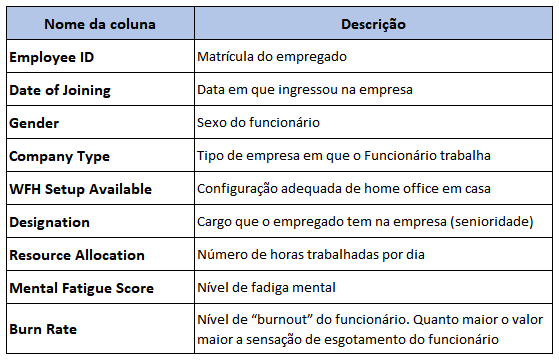

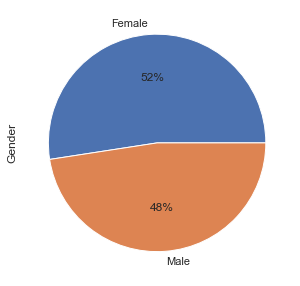

In [11]:
plt.figure(figsize=(10,5))
df_kaggle['Gender'].value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.show()

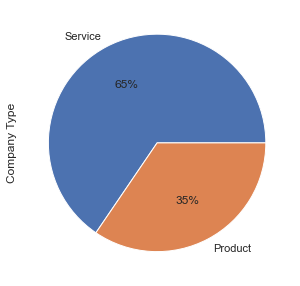

In [12]:
plt.figure(figsize=(10,5))
df_kaggle['Company Type'].value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.show()

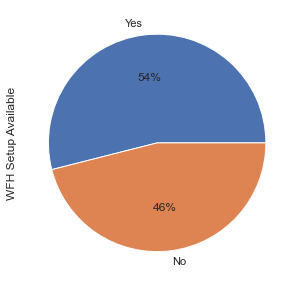

In [13]:
plt.figure(figsize=(10,5))
df_kaggle['WFH Setup Available'].value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.show()

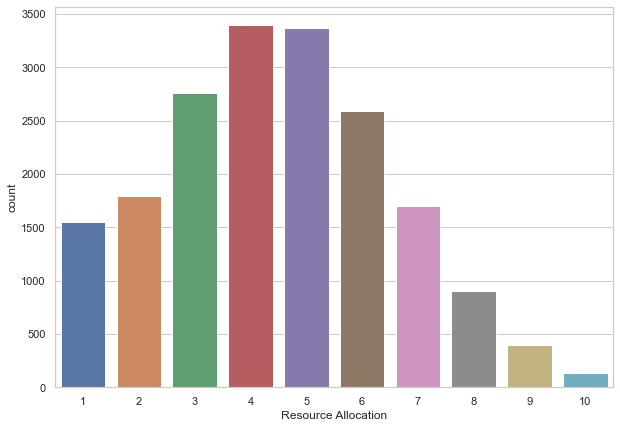

In [14]:
plt.figure(figsize=(10,7))
sns.countplot(data=df_kaggle, x='Resource Allocation', order=[1,2,3,4,5,6,7,8,9,10]);

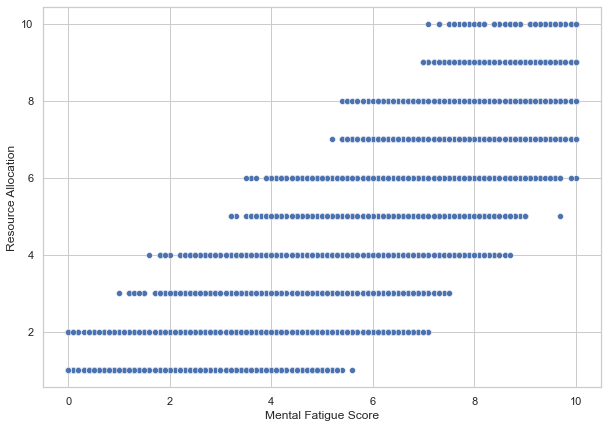

In [15]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=df_kaggle, x='Mental Fatigue Score', y='Resource Allocation');

## Processo de encoding dos dados

In [16]:
df_train = df_kaggle.copy()


df_train['Gender'] = df_train['Gender'].map({'Female': 1, 'Male': 0})
df_train['Company Type'] = df_train['Company Type'].map({'Service': 1, 'Product': 0})
df_train['WFH Setup Available'] = df_train['WFH Setup Available'].map({'Yes': 1, 'No': 0})

In [17]:
df_train.drop(['Employee ID','Date of Joining'],axis=1,inplace=True)

In [18]:
df_train.head(5)

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,1,1,0,2.0,3.0,3.8,0.16
1,0,1,1,1.0,2.0,5.0,0.36
3,0,1,1,1.0,1.0,2.6,0.20
4,1,1,0,3.0,7.0,6.9,0.52
5,0,0,1,2.0,4.0,3.6,0.29


In [19]:
df_train.dtypes

Gender                    int64
Company Type              int64
WFH Setup Available       int64
Designation             float64
Resource Allocation     float64
Mental Fatigue Score    float64
Burn Rate               float64
dtype: object

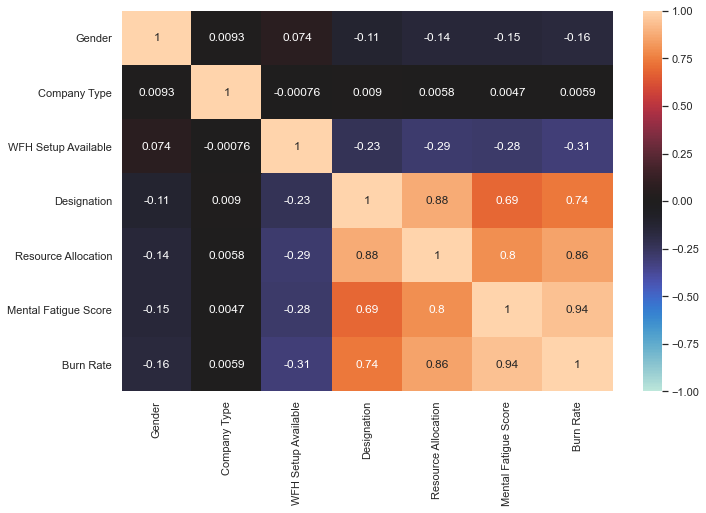

In [20]:
plt.figure(figsize=(11,7))
corr = df_train.corr()
sns.heatmap(corr, vmin=-1, center=0, vmax=1, annot=True);

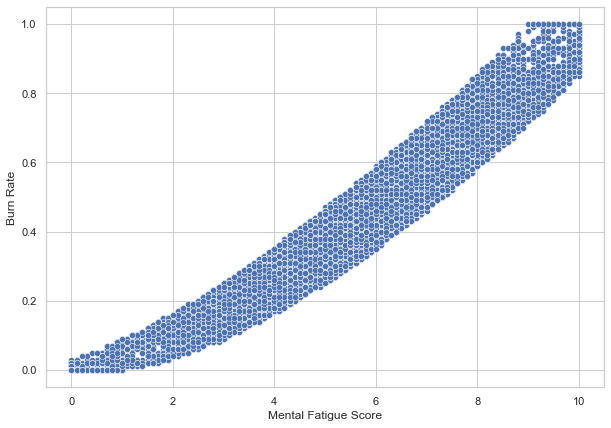

In [21]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=df_train, x='Mental Fatigue Score', y='Burn Rate');

## Criando amostragem dos dados/ Pré processameno

In [22]:
y= df_train.pop('Burn Rate')
X= df_train

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state= 42)

print("train data size:",X_train.shape)
print("test data size:",X_test.shape)

train data size: (14872, 6)
test data size: (3718, 6)


## Análise Preditiva

In [24]:
#Regresão linear
lr_model = LinearRegression()

param_grid_lr = {
    'fit_intercept': [True, False],
    'normalize': [True, False]
}

In [25]:
grid_search_lr = GridSearchCV(lr_model, param_grid_lr, cv=5, scoring='neg_mean_squared_error')
grid_search_lr.fit(X_train, y_train)
print("Melhores parâmetros:", grid_search_lr.best_params_)

Melhores parâmetros: {'fit_intercept': True, 'normalize': False}


In [26]:
best_model_lr = grid_search_lr.best_estimator_
y_pred1 = best_model_lr.predict(X_test)

# Avaliando o modelo
print('MAE:{:.3f}'.format( metrics.mean_absolute_error(y_test, y_pred1)))
print('RMSE:{:.3f}'.format( metrics.mean_squared_error(y_test, y_pred1)))
print('R2:{:.2f}'.format( metrics.r2_score(y_test, y_pred1)))

MAE:0.046
RMSE:0.003
R2:0.92


In [27]:
#Árvore de decisão e que utiliza uma estrutura de Gradient boosting
xgb_model = XGBRegressor()

param_grid_xgb = {'learning_rate': [0.01, 0.1, 0.5],
              'max_depth': [3, 5, 7],
              'n_estimators': [100, 500, 1000]}

In [28]:
grid_search_xgb = GridSearchCV(xgb_model, param_grid_xgb, cv=5, scoring='neg_mean_squared_error')
grid_search_xgb.fit(X_train, y_train)
print("Best Parameters: ", grid_search_xgb.best_params_)

Best Parameters:  {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 1000}


In [29]:
best_model_xgb = grid_search_xgb.best_estimator_
y_pred2 = best_model_xgb.predict(X_test)

# Avaliando o modelo
print('MAE:{:.3f}'.format( metrics.mean_absolute_error(y_test, y_pred2)))
print('RMSE:{:.3f}'.format( metrics.mean_squared_error(y_test, y_pred2)))
print('R2:{:.2f}'.format( metrics.r2_score(y_test, y_pred2)))

MAE:0.043
RMSE:0.003
R2:0.93


In [30]:
#Árvore de decisão
dt_model = DecisionTreeRegressor()

param_grid_dt = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}



In [31]:
grid_search_dt = GridSearchCV(dt_model, param_grid_dt, cv=5, scoring='neg_mean_squared_error')
grid_search_dt.fit(X_train, y_train)
print("Melhores parâmetros:", grid_search_dt.best_params_)

Melhores parâmetros: {'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [32]:
best_model_dt = grid_search_dt.best_estimator_
y_pred3 = best_model_dt.predict(X_test)

# Avaliando o modelo
print('MAE:{:.3f}'.format( metrics.mean_absolute_error(y_test, y_pred3)))
print('RMSE:{:.3f}'.format( metrics.mean_squared_error(y_test, y_pred3)))
print('R2:{:.2f}'.format( metrics.r2_score(y_test, y_pred3)))

MAE:0.044
RMSE:0.003
R2:0.92


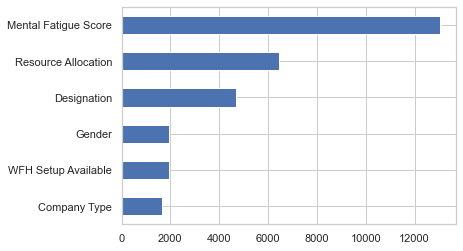

In [33]:
feature_important = best_model_xgb.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score",ascending= True)
data.plot(kind='barh')
plt.legend().set_visible(False)

_________________________________________________________________________________________________________________________
# Analisando datasets de uma empresa de TI e uma do ramo de Oil&Gás

## Dataset TI

In [34]:
df_form_ti = pd.read_csv("https://raw.githubusercontent.com/Davidomfer/TCC_PUCMinas/main/form_ti.csv",sep = ";")

In [35]:
print(df_form_ti.shape)
df_form_ti.head(5)

(115, 16)


,ID,idade,estado,data_inicio,identidade_genero,orientacao_sexual,onde_esta_atuando,dias_remoto,dias_escritorio,nivel,tempo_demandas,confortavel,fadiga_mental,neurodiversidade,qual_neurodiversidade,treinamento_ie
0,1,25 a 29,Alagoas,31/01/2022,Homem Cisgênero,Heterossexual,Projeto Integrado,5.0,0.0,Junior,10 horas,Sim,7.0,Sim,Transtorno do déficit de atenção com hiperativ...,NaN
1,2,30 a 39,São Paulo,03/01/2022,Homem Cisgênero,Heterossexual,Projeto Integrado,5.0,0.0,Junior,8 horas,Sim,4.0,Sim,Transtorno do déficit de atenção com hiperativ...,NaN
2,3,40 a 49,São Paulo,21/12/2021,Mulher Cisgênero,Heterossexual,Projeto Integrado,5.0,0.0,Junior,10 horas,Sim,8.0,Nao,Nenhuma,Sim
3,4,25 a 29,Espírito Santo,17/01/2022,Homem Cisgênero,Heterossexual,Projeto Integrado,5.0,0.0,Junior,8 horas,Não,10.0,Nao,Nenhuma,Sim
4,5,40 a 49,São Paulo,07/02/2022,Homem Cisgênero,Heterossexual,Projeto Integrado,5.0,0.0,Junior,2 horas,Sim,6.0,Nao,Nenhuma,Sim


In [36]:
df_form_ti.drop(['data_inicio','orientacao_sexual','dias_remoto','dias_escritorio'
                 ,'neurodiversidade','qual_neurodiversidade','treinamento_ie'],axis=1,inplace=True)

In [37]:
df_form_ti.isna().sum()

ID                   0
idade                1
estado               1
identidade_genero    1
onde_esta_atuando    1
nivel                1
tempo_demandas       1
confortavel          1
fadiga_mental        1
dtype: int64

In [38]:
df_form_ti = df_form_ti.dropna()

In [39]:
df_form_ti.dtypes

ID                    object
idade                 object
estado                object
identidade_genero     object
onde_esta_atuando     object
nivel                 object
tempo_demandas        object
confortavel           object
fadiga_mental        float64
dtype: object

In [40]:
df_form_ti['confortavel'].value_counts()

Sim    107
Não      7
Name: confortavel, dtype: int64

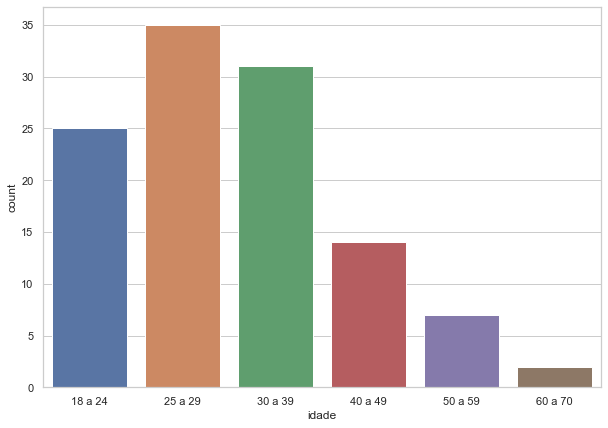

In [41]:
plt.figure(figsize=(10,7))
sns.countplot(data=df_form_ti, x='idade',order = ['18 a 24','25 a 29','30 a 39', '40 a 49', '50 a 59', '60 a 70']);

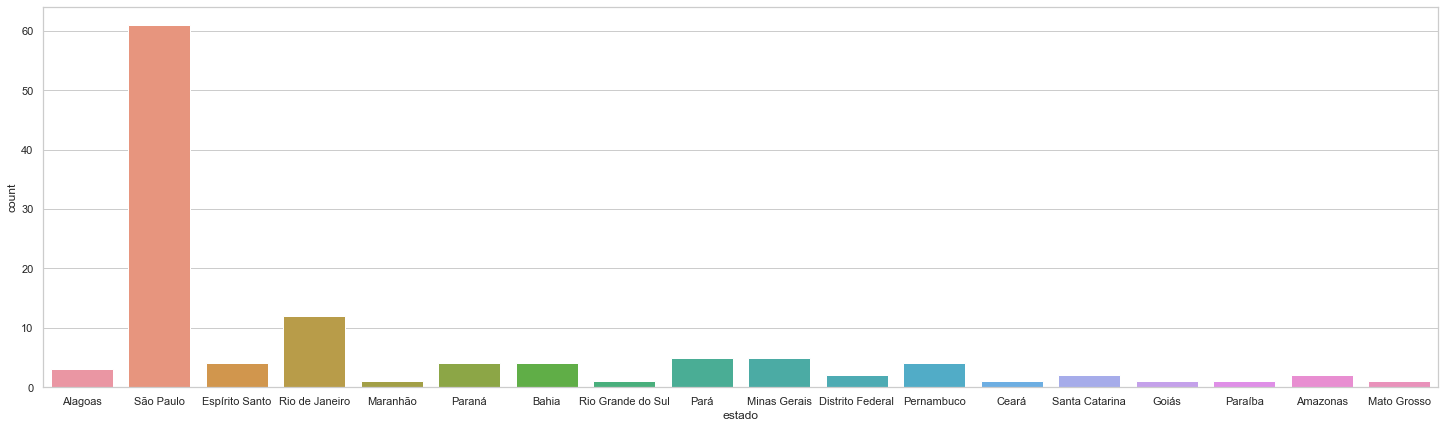

In [42]:
plt.figure(figsize=(25,7))
sns.countplot(data=df_form_ti, x='estado');

<AxesSubplot:xlabel='confortavel', ylabel='fadiga_mental'>

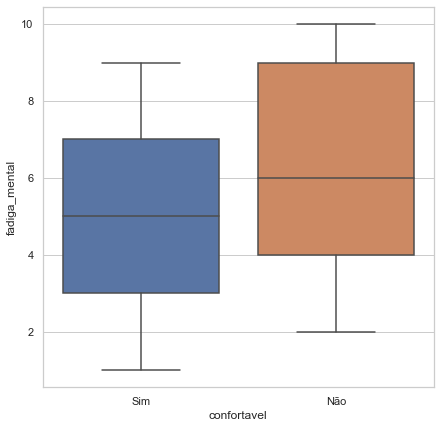

In [43]:
plt.figure(figsize=(7,7))
sns.boxplot(data=df_form_ti, x="confortavel", y="fadiga_mental")

In [44]:
df_form_ti.drop(['idade','estado'],axis=1,inplace=True)

In [45]:
df_form_ti.nunique()

ID                   114
identidade_genero      6
onde_esta_atuando      7
nivel                  4
tempo_demandas        11
confortavel            2
fadiga_mental         10
dtype: int64

In [46]:
df_form_ti['identidade_genero'].unique()

array(['Homem Cisgênero', 'Mulher Cisgênero', 'Não sei responder',
       'Mulher Transgênero', 'Queer', 'Outro'], dtype=object)

In [47]:
df_form_ti['identidade_genero'].value_counts()

Homem Cisgênero       73
Mulher Cisgênero      32
Não sei responder      3
Outro                  3
Mulher Transgênero     2
Queer                  1
Name: identidade_genero, dtype: int64

In [48]:
df_form_ti['identidade_genero'] = df_form_ti['identidade_genero'].replace({'Não sei responder':'Outro','Queer':'Outro'})

In [49]:
df_form_ti[['Gender', 'col1']] = df_form_ti['identidade_genero'].str.split(' ',expand=True)
df_form_ti['tempo_demandas'] = df_form_ti['tempo_demandas'].str.slice(0,2)
df_form_ti.head(5)

,ID,identidade_genero,onde_esta_atuando,nivel,tempo_demandas,confortavel,fadiga_mental,Gender,col1
0,1,Homem Cisgênero,Projeto Integrado,Junior,10,Sim,7.0,Homem,Cisgênero
1,2,Homem Cisgênero,Projeto Integrado,Junior,8,Sim,4.0,Homem,Cisgênero
2,3,Mulher Cisgênero,Projeto Integrado,Junior,10,Sim,8.0,Mulher,Cisgênero
3,4,Homem Cisgênero,Projeto Integrado,Junior,8,Não,10.0,Homem,Cisgênero
4,5,Homem Cisgênero,Projeto Integrado,Junior,2,Sim,6.0,Homem,Cisgênero


In [50]:
df_form_ti['identidade_genero'].value_counts()

Homem Cisgênero       73
Mulher Cisgênero      32
Outro                  7
Mulher Transgênero     2
Name: identidade_genero, dtype: int64

In [51]:
df_form_ti.drop(['identidade_genero','col1'],axis=1,inplace=True)

In [52]:
df_form_ti

,ID,onde_esta_atuando,nivel,tempo_demandas,confortavel,fadiga_mental,Gender
0,1,Projeto Integrado,Junior,10,Sim,7.0,Homem
1,2,Projeto Integrado,Junior,8,Sim,4.0,Homem
2,3,Projeto Integrado,Junior,10,Sim,8.0,Mulher
3,4,Projeto Integrado,Junior,8,Não,10.0,Homem
4,5,Projeto Integrado,Junior,2,Sim,6.0,Homem
...,...,...,...,...,...,...,...
109,110,Laboratórios,Trainee,8,Sim,5.0,Outro
110,111,Squad,Pleno,8,Sim,3.0,Homem
111,112,Laboratórios,Trainee,8,Sim,8.0,Homem
112,113,Laboratórios,Trainee,7,Sim,2.0,Homem


In [53]:
df_form_ti['onde_esta_atuando'].unique()

array(['Projeto Integrado', 'Produto Interno', 'Squad', 'Laboratórios',
       'Projeto Interno', 'Projeto de Cliente', 'Produto do Cliente'],
      dtype=object)

In [54]:
df_form_ti['onde_esta_atuando'] = df_form_ti['onde_esta_atuando'].replace({'Projeto Integrado': 'Serviço'
                                                                           ,'Produto Interno':'Produto'
                                                                           ,'Squad':'Serviço'
                                                                           ,'Laboratórios':'Serviço'
                                                                           ,'Projeto Interno':'Serviço'
                                                                           ,'Projeto de Cliente': 'Serviço'
                                                                           ,'Produto do Cliente':'Produto'})
df_form_ti

,ID,onde_esta_atuando,nivel,tempo_demandas,confortavel,fadiga_mental,Gender
0,1,Serviço,Junior,10,Sim,7.0,Homem
1,2,Serviço,Junior,8,Sim,4.0,Homem
2,3,Serviço,Junior,10,Sim,8.0,Mulher
3,4,Serviço,Junior,8,Não,10.0,Homem
4,5,Serviço,Junior,2,Sim,6.0,Homem
...,...,...,...,...,...,...,...
109,110,Serviço,Trainee,8,Sim,5.0,Outro
110,111,Serviço,Pleno,8,Sim,3.0,Homem
111,112,Serviço,Trainee,8,Sim,8.0,Homem
112,113,Serviço,Trainee,7,Sim,2.0,Homem


In [55]:
df_form_ti.columns=['ID','Company Type', 'Designation','Resource Allocation','WFH Setup Available',
                    'Mental Fatigue Score', 'Gender']


In [56]:
df_form_ti.head(5)

,ID,Company Type,Designation,Resource Allocation,WFH Setup Available,Mental Fatigue Score,Gender
0,1,Serviço,Junior,10,Sim,7.0,Homem
1,2,Serviço,Junior,8,Sim,4.0,Homem
2,3,Serviço,Junior,10,Sim,8.0,Mulher
3,4,Serviço,Junior,8,Não,10.0,Homem
4,5,Serviço,Junior,2,Sim,6.0,Homem


## Encoding

In [57]:
df_form_ti['Gender'] = df_form_ti['Gender'].map({'Mulher': 1, 'Homem': 0, 'Outro': 2})
df_form_ti['Company Type'] = df_form_ti['Company Type'].map({'Serviço': 1, 'Produto': 0})
df_form_ti['WFH Setup Available'] = df_form_ti['WFH Setup Available'].map({'Sim': 1, 'Não': 0})
df_form_ti['Designation'] = df_form_ti['Designation'].map({'Trainee': 0, 'Junior': 1, 'Pleno': 2,'Senior': 3 })

In [58]:
df_form_ti.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114 entries, 0 to 113
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    114 non-null    object 
 1   Company Type          114 non-null    int64  
 2   Designation           114 non-null    int64  
 3   Resource Allocation   114 non-null    object 
 4   WFH Setup Available   114 non-null    int64  
 5   Mental Fatigue Score  114 non-null    float64
 6   Gender                114 non-null    int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 12.1+ KB


In [59]:
df_form_ti['Resource Allocation'] = df_form_ti['Resource Allocation'].astype(float)
df_form_ti['ID'] = df_form_ti['ID'].astype(int)

In [60]:
df_form_ti.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114 entries, 0 to 113
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    114 non-null    int32  
 1   Company Type          114 non-null    int64  
 2   Designation           114 non-null    int64  
 3   Resource Allocation   114 non-null    float64
 4   WFH Setup Available   114 non-null    int64  
 5   Mental Fatigue Score  114 non-null    float64
 6   Gender                114 non-null    int64  
dtypes: float64(2), int32(1), int64(4)
memory usage: 11.7 KB


In [61]:
df_form_ti = df_form_ti[['ID','Gender', 'Company Type', 'WFH Setup Available', 
                         'Designation', 'Resource Allocation', 'Mental Fatigue Score']]

In [62]:
# Dataset limpo e pronto para predição
df_form_ti.head(5)

,ID,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score
0,1,0,1,1,1,10.0,7.0
1,2,0,1,1,1,8.0,4.0
2,3,1,1,1,1,10.0,8.0
3,4,0,1,0,1,8.0,10.0
4,5,0,1,1,1,2.0,6.0


## Predição Datasets TI

In [63]:
ti_pred = best_model_xgb.predict(df_form_ti.drop('ID', axis=1))

In [64]:
result_ti = pd.DataFrame(ti_pred, index = df_form_ti['ID'], columns = ['Burn Rate'])

In [65]:
# Analisando criticidade do Burn Rate acima de 0,7
critc_ti = result_ti['Burn Rate'] >= 0.7
result_ti[critc_ti].count()

Burn Rate    26
dtype: int64

In [66]:
result_ti[critc_ti]

,Burn Rate
ID,
1,0.790240
3,0.848616
4,0.921894
7,0.715314
8,0.753580
20,0.722567
24,0.718611
28,0.756484
29,0.718611


In [67]:
# Analisando criticidade do Burn Rate dentro dos 0,7 os que estão acima de 0,8
critc_ti = result_ti['Burn Rate'] >= 0.8
result_ti[critc_ti].count()


Burn Rate    4
dtype: int64

In [68]:
result_ti[critc_ti]

,Burn Rate
ID,
3,0.848616
4,0.921894
55,0.827065
60,0.840850


_______________________________________________
## Dataset Oil&Gás

In [69]:
df_form_oil = pd.read_csv("https://raw.githubusercontent.com/Davidomfer/TCC_PUCMinas/main/form_oil.csv",sep = ",")

In [70]:
print(df_form_oil.shape)
df_form_oil['ID'] = df_form_oil.index + 1
df_form_oil.head(5)

(60, 10)


,Carimbo de data/hora,Faixa etária / idade:,Estado?,Sexo:,Tipo de Empresa :,Nível na Empresa?,Data de entrada na empresa?,Ambiente home-office adequado para o trabalho?,Quantidade de horas para executar as demandas diárias?,Índice de fadiga mental ( como você avalia seu desgaste mental enquanto trabalha),ID
0,2022/09/15 12:18:30 PM GMT-3,31 a 40,Rio de Janeiro,Masculino,Serviço,Junior,2022-05-13,Não,6,5,1
1,2022/09/15 12:22:47 PM GMT-3,31 a 40,Rio de Janeiro,Masculino,Serviço,Pleno,2021-03-15,Não,7,8,2
2,2022/09/15 7:32:12 PM GMT-3,25 a 30,Espírito Santo,Feminino,Serviço,Pleno,2020-10-05,Não,9,9,3
3,2022/09/16 4:00:52 PM GMT-3,31 a 40,Rio de Janeiro,Masculino,Serviço,Sênior,2015-10-22,Sim,8,7,4
4,2022/09/16 4:07:06 PM GMT-3,31 a 40,Rio de Janeiro,Masculino,Serviço,Sênior,2013-09-01,Não,10,8,5


In [71]:
df_form_oil.isna().sum()

Carimbo de data/hora                                                                 0
Faixa etária / idade:                                                                0
Estado?                                                                              0
Sexo:                                                                                0
Tipo de Empresa :                                                                    0
Nível na Empresa?                                                                    0
Data de entrada na empresa?                                                          0
Ambiente home-office adequado para o trabalho?                                       0
Quantidade de horas para executar as demandas diárias?                               0
Índice de fadiga mental ( como você avalia seu desgaste mental enquanto trabalha)    0
ID                                                                                   0
dtype: int64

In [72]:
df_form_oil['Ambiente home-office adequado para o trabalho? '].value_counts()

Sim    40
Não    20
Name: Ambiente home-office adequado para o trabalho? , dtype: int64

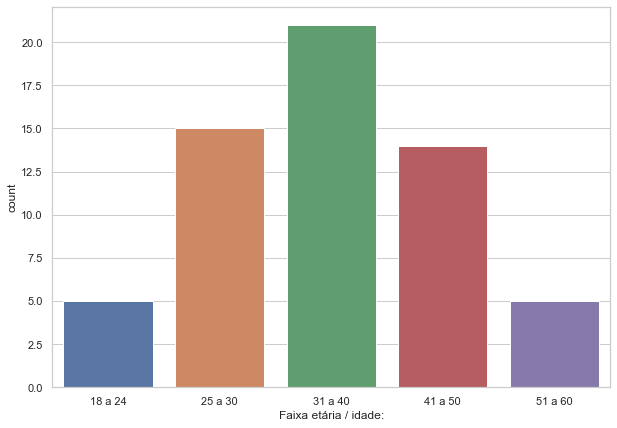

In [73]:
plt.figure(figsize=(10,7))
sns.countplot(data=df_form_oil, x='Faixa etária / idade:',order = ['18 a 24','25 a 30','31 a 40', '41 a 50', '51 a 60']);

<AxesSubplot:xlabel='Estado?', ylabel='count'>

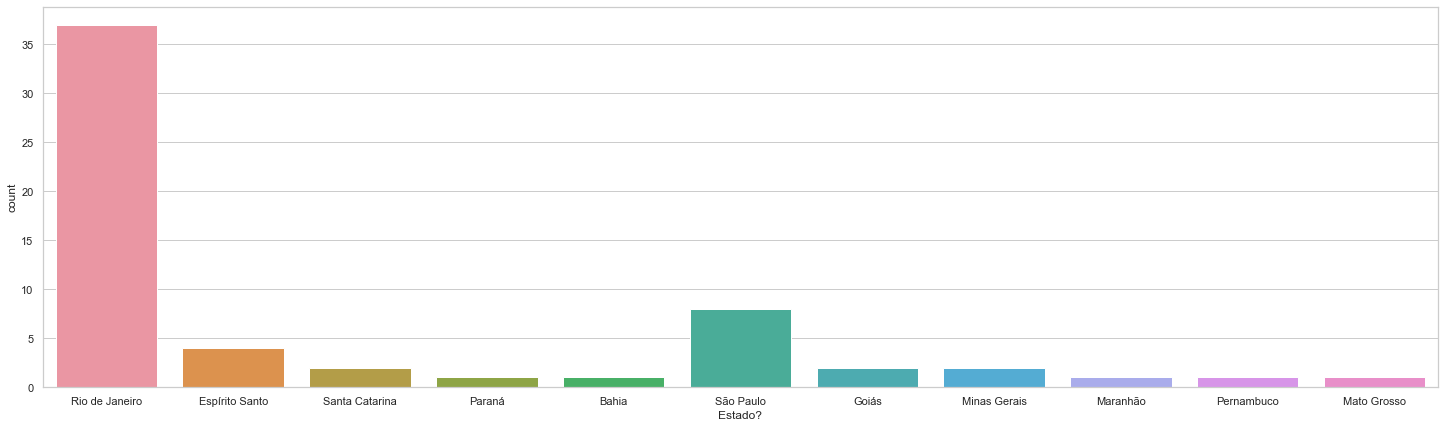

In [74]:
plt.figure(figsize=(25,7))
sns.countplot(data=df_form_oil, x='Estado?')

<AxesSubplot:xlabel='Ambiente home-office adequado para o trabalho? ', ylabel='Índice de fadiga mental ( como você avalia seu desgaste mental enquanto trabalha)'>

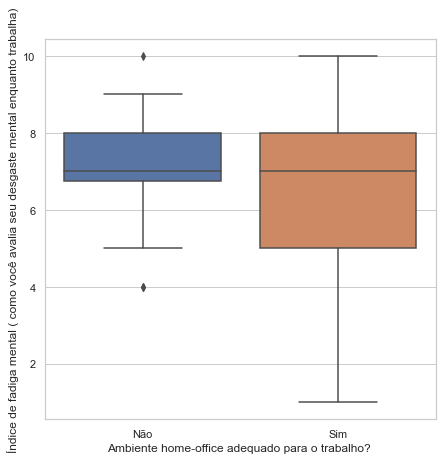

In [75]:
plt.figure(figsize=(7,7))
sns.boxplot(data=df_form_oil, x="Ambiente home-office adequado para o trabalho? ",
            y="Índice de fadiga mental ( como você avalia seu desgaste mental enquanto trabalha)")

In [76]:
df_form_oil.drop(['Carimbo de data/hora','Faixa etária / idade:','Estado?','Data de entrada na empresa?'],axis=1,inplace=True)
df_form_oil.head(5)

,Sexo:,Tipo de Empresa :,Nível na Empresa?,Ambiente home-office adequado para o trabalho?,Quantidade de horas para executar as demandas diárias?,Índice de fadiga mental ( como você avalia seu desgaste mental enquanto trabalha),ID
0,Masculino,Serviço,Junior,Não,6,5,1
1,Masculino,Serviço,Pleno,Não,7,8,2
2,Feminino,Serviço,Pleno,Não,9,9,3
3,Masculino,Serviço,Sênior,Sim,8,7,4
4,Masculino,Serviço,Sênior,Não,10,8,5


## Encoding

In [77]:
df_form_oil['Sexo:'] = df_form_oil['Sexo:'].map({'Feminino': 1, 'Masculino': 0})
df_form_oil['Tipo de Empresa :'] = df_form_oil['Tipo de Empresa :'].map({'Serviço': 1, 'Produto': 0})
df_form_oil['Nível na Empresa?'] = df_form_oil['Nível na Empresa?'].map({'Junior': 1, 'Pleno': 2,'Sênior':2})
df_form_oil['Ambiente home-office adequado para o trabalho? '] = df_form_oil[
            'Ambiente home-office adequado para o trabalho? '].map({'Sim': 1, 'Não': 0})

In [78]:
df_form_oil.head(5)

,Sexo:,Tipo de Empresa :,Nível na Empresa?,Ambiente home-office adequado para o trabalho?,Quantidade de horas para executar as demandas diárias?,Índice de fadiga mental ( como você avalia seu desgaste mental enquanto trabalha),ID
0,0,1,1,0,6,5,1
1,0,1,2,0,7,8,2
2,1,1,2,0,9,9,3
3,0,1,2,1,8,7,4
4,0,1,2,0,10,8,5


In [79]:
df_form_oil.columns=['Gender','Company Type','Designation','WFH Setup Available','Resource Allocation',
                     'Mental Fatigue Score','ID']

In [80]:
df_form_oil = df_form_oil[['ID','Gender', 'Company Type', 'WFH Setup Available', 
                         'Designation', 'Resource Allocation', 'Mental Fatigue Score']]

In [81]:
df_form_oil.dtypes

ID                      int64
Gender                  int64
Company Type            int64
WFH Setup Available     int64
Designation             int64
Resource Allocation     int64
Mental Fatigue Score    int64
dtype: object

In [82]:
# Dataset limpo e pronto para predição
df_form_oil.head(5)

,ID,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score
0,1,0,1,0,1,6,5
1,2,0,1,0,2,7,8
2,3,1,1,0,2,9,9
3,4,0,1,1,2,8,7
4,5,0,1,0,2,10,8


## Predição Datasets Oil&Gàs

In [83]:
oil_pred = best_model_xgb.predict(df_form_oil.drop('ID', axis=1))

In [84]:
result_oil = pd.DataFrame(oil_pred, index = df_form_oil['ID'], columns = ['Burn Rate'])

In [85]:
# Analisando criticidade do Burn Rate acima de 0,7
critc_oil = result_oil['Burn Rate'] >= 0.7
result_oil[critc_oil].count()

Burn Rate    37
dtype: int64

In [86]:
result_oil[critc_oil]

,Burn Rate
ID,
2,0.718301
3,0.838453
4,0.728272
5,0.854411
7,0.769647
8,0.788835
9,0.769647
10,0.795664
11,0.787957


In [87]:
# Analisando criticidade do Burn Rate dentro dos 0,7 os que estão acima de 0,8
critc_oil = result_oil['Burn Rate'] >= 0.8
result_oil[critc_oil].count()

Burn Rate    9
dtype: int64

In [88]:
result_oil[critc_oil]

,Burn Rate
ID,
3,0.838453
5,0.854411
29,0.847343
32,0.839032
47,0.923358
50,0.842552
51,0.944308
56,0.839032
59,0.838039
